In [1]:
import pandas as pd

In [2]:
def map_groups(exp):

    if 'gf' in exp:
        return 'Geneformer'
    elif 'Geneformer' in exp:
        return 'Geneformer'
    elif 'scfoundation' in exp:
        return 'Other'
    elif 'scimilarity' in exp:
        return 'Other'
    elif 'scgpt' in exp:
        return 'scGPT'
    elif 'cellplm' in exp:
        return 'Other'
    
    elif any(x in exp for x in ['hvg', 'pca', 'scvi']):
        return 'Baseline'
    else:
        return 'Other'  # optional fallback

In [3]:
model_name_map={
'hvg': 'HVG',
'pca': 'PCA',
'scgpt': 'scGPT', 
'scgpt_cancer': 'scGPT [cancer]',
'scvi':'scVI',
'scvi_donor_id':'scVI',
'scfoundation':'scFoundation',
'scimilarity':'SCimiarity',
'cellplm':'CellPLM',
'gf-6L-30M-i2048': 'GF-V1',
'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
'Geneformer-V2-104M': 'GF-V2',
'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
'Geneformer-V2-316M': 'GF-V2-Deep',
'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

}

In [4]:
import os
results_path = os.path.abspath('./fig2_a_metrics/metrics_10_runs.csv')

In [7]:
results_10_runs = pd.read_csv(results_path)

In [8]:
results_10_runs

,method,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
0,Geneformer-V2-104M_continue,0.134121,0.098236,0.453388,0.657449,0.414078,0.712715,0.028421,0.228582,geneformer
1,Geneformer-V2-104M_continue,0.128249,0.090002,0.449664,0.650927,0.420008,0.739867,0.027659,0.222638,geneformer
2,Geneformer-V2-104M_continue,0.141969,0.099828,0.451788,0.673212,0.421370,0.719246,0.026274,0.231195,geneformer
3,Geneformer-V2-104M_continue,0.137627,0.105614,0.450572,0.666717,0.415430,0.732193,0.027073,0.231271,geneformer
4,Geneformer-V2-104M_continue,0.121275,0.072926,0.450288,0.643840,0.421568,0.746291,0.033147,0.214830,geneformer
...,...,...,...,...,...,...,...,...,...,...
145,gf-6L-30M-i2048_continue,0.718855,0.658419,0.501190,0.989958,0.474005,0.890504,0.143167,0.626154,geneformer
146,gf-6L-30M-i2048_continue,0.696219,0.612869,0.513231,0.986267,0.473419,0.864790,0.148172,0.607440,geneformer
147,gf-6L-30M-i2048_continue,0.734348,0.673265,0.498074,0.984783,0.471381,0.883110,0.152225,0.635229,geneformer
148,gf-6L-30M-i2048_continue,0.686989,0.636090,0.505325,0.966367,0.470416,0.878100,0.149466,0.609468,geneformer


In [9]:
results_10_runs.method.value_counts()

method
Geneformer-V2-104M_continue    10
Geneformer-V2-104M_CLcancer    10
hvg                            10
Geneformer-V2-316M             10
Geneformer-V2-104M             10
scgpt_cancer                   10
scfoundation                   10
scgpt                          10
cellplm                        10
scimilarity                    10
pca                            10
__scvi                         10
gf-6L-30M-i2048                10
scvi                           10
gf-6L-30M-i2048_continue       10
Name: count, dtype: int64

In [17]:
ind = results_10_runs.method.str.startswith('__')
results_10_runs = results_10_runs[~ind]


0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: method, Length: 150, dtype: bool

In [18]:
results_10_runs['group'] =  results_10_runs['method'].map(map_groups)

/var/tmp/ipykernel_3762/1294479418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_10_runs['group'] =  results_10_runs['method'].map(map_groups)


In [19]:
results_10_runs['method'] =  results_10_runs['method'].map(model_name_map)

/var/tmp/ipykernel_3762/3976048978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_10_runs['method'] =  results_10_runs['method'].map(model_name_map)


In [20]:
results_10_runs = results_10_runs[results_10_runs['method'] != 'GF-V2 [continue]']

In [21]:
nmi_df = results_10_runs[['method', 'NMI_cluster/label', 'group']].copy()
nmi_df.columns= ['method', 'NMI', 'group']

In [22]:
ari_df = results_10_runs[['method', 'ARI_cluster/label', 'group']].copy()
ari_df.columns= ['method', 'ARI', 'group']

In [23]:
asw_df = results_10_runs[['method', 'ASW_label', 'group']].copy()
asw_df.columns= ['method', 'ASW', 'group']

In [24]:
# nmi_df['method'] =  nmi_df['method'].map(model_name_map)

In [25]:
# nmi_df['method'] = nmi_df['method'].map(model_name_map)

In [26]:
nmi_df

,method,NMI,group
10,GF-V2 [cancer],0.694601,Geneformer
11,GF-V2 [cancer],0.634002,Geneformer
12,GF-V2 [cancer],0.603562,Geneformer
13,GF-V2 [cancer],0.588440,Geneformer
14,GF-V2 [cancer],0.674633,Geneformer
...,...,...,...
145,GF-V1 [continue],0.718855,Geneformer
146,GF-V1 [continue],0.696219,Geneformer
147,GF-V1 [continue],0.734348,Geneformer
148,GF-V1 [continue],0.686989,Geneformer


In [27]:
nmi_df.group.unique()

array(['Geneformer', 'Baseline', 'scGPT', 'Other'], dtype=object)

In [28]:
group= 'scGPT'

In [29]:
subset = nmi_df[nmi_df['group'] == group].copy()

In [30]:
subset

,method,NMI,group
50,scGPT [cancer],0.777581,scGPT
51,scGPT [cancer],0.755425,scGPT
52,scGPT [cancer],0.730268,scGPT
53,scGPT [cancer],0.757823,scGPT
54,scGPT [cancer],0.727206,scGPT
55,scGPT [cancer],0.746462,scGPT
56,scGPT [cancer],0.715955,scGPT
57,scGPT [cancer],0.740989,scGPT
58,scGPT [cancer],0.773930,scGPT
59,scGPT [cancer],0.726947,scGPT


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

def plot_metric_by_group_violin(df, metric_col="NMI_cluster/label", title=None, ylim=(0.4, 0.8)):
    """
    Plots a violin plot of the specified metric for each group, with adaptive subplot widths.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with columns 'group', 'method', and the metric.
    - metric_col (str): Column name of the metric to plot.
    - title (str): Optional title for the entire plot.
    - ylim (tuple): Y-axis limits.
    """

    sns.set(style="whitegrid")

    # Get unique groups and method counts
    group_method_counts = df.groupby("group")["method"].nunique()
    total_methods = group_method_counts.sum()

    # Set up figure and grid
    fig = plt.figure(figsize=(6 * len(group_method_counts) / 2, 6))
    gs = gridspec.GridSpec(1, len(group_method_counts), width_ratios=group_method_counts.values, figure=fig)

    for idx, (group, method_count) in enumerate(group_method_counts.items()):
        ax = fig.add_subplot(gs[0, idx])
        subset = df[df['group'] == group].copy()

        # Sort methods by median
        method_stats = subset.groupby("method")[metric_col].median().sort_values(ascending=True)
        ordered_methods = method_stats.index.tolist()
        subset["method"] = pd.Categorical(subset["method"], categories=ordered_methods, ordered=True)

        # Violin plot
        sns.violinplot(
            data=subset,
            x="method",
            y=metric_col,
            ax=ax,
            inner="quartile",
            scale="area",
            width=0.5
        )

        # Line plot for group medians
        stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
        ax.plot(range(len(ordered_methods)), stat_values, marker='o', linestyle='--', color='black', label='Median')

        ax.set_title(f"{group}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_xlabel('')
        ax.set_ylim(*ylim)
        if idx != 0:
            ax.set_yticklabels([])
            ax.set_ylabel("")

    # Final layout and title
    plot_title = title or f"{metric_col} Distribution by Method (Grouped)"
    fig.suptitle(plot_title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.show()
    return fig

In [32]:
group_method_counts = nmi_df.groupby("group")["method"].nunique()
group_method_counts

group
Baseline      3
Geneformer    5
Other         3
scGPT         2
Name: method, dtype: int64

In [33]:
group_method_counts.sort_values(ascending=False)

group
Geneformer    5
Baseline      3
Other         3
scGPT         2
Name: method, dtype: int64

/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_3762/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_3762/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel

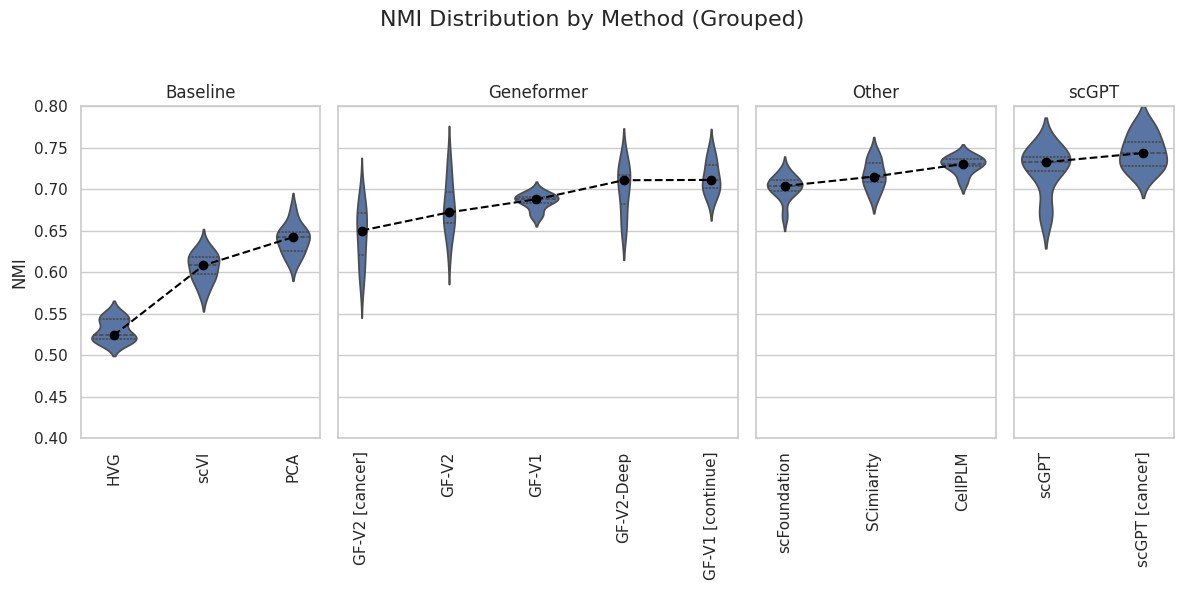

In [35]:
fig = plot_metric_by_group_violin(nmi_df, metric_col="NMI")
plt.savefig('./fig2_a_metrics/nmi3.png', dpi=100)


/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_3762/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_3762/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel

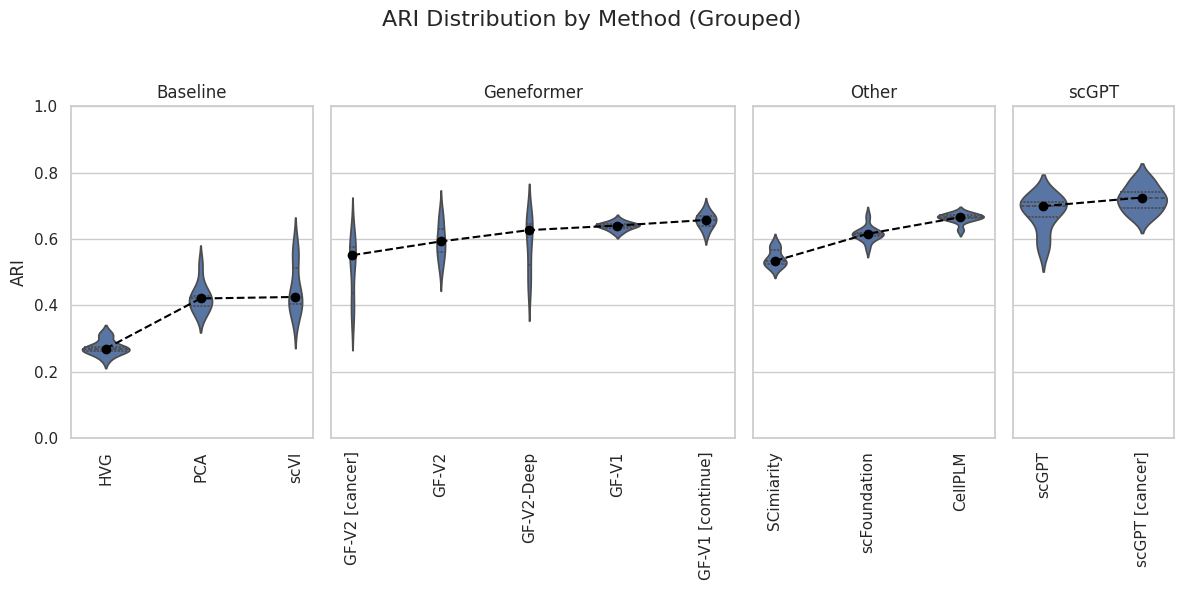

In [36]:
fig = plot_metric_by_group_violin(ari_df, metric_col="ARI", ylim=(0.0, 1.))
plt.savefig('./fig2_a_metrics/ari3.png', dpi=100)

/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_3762/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_3762/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_3762/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel

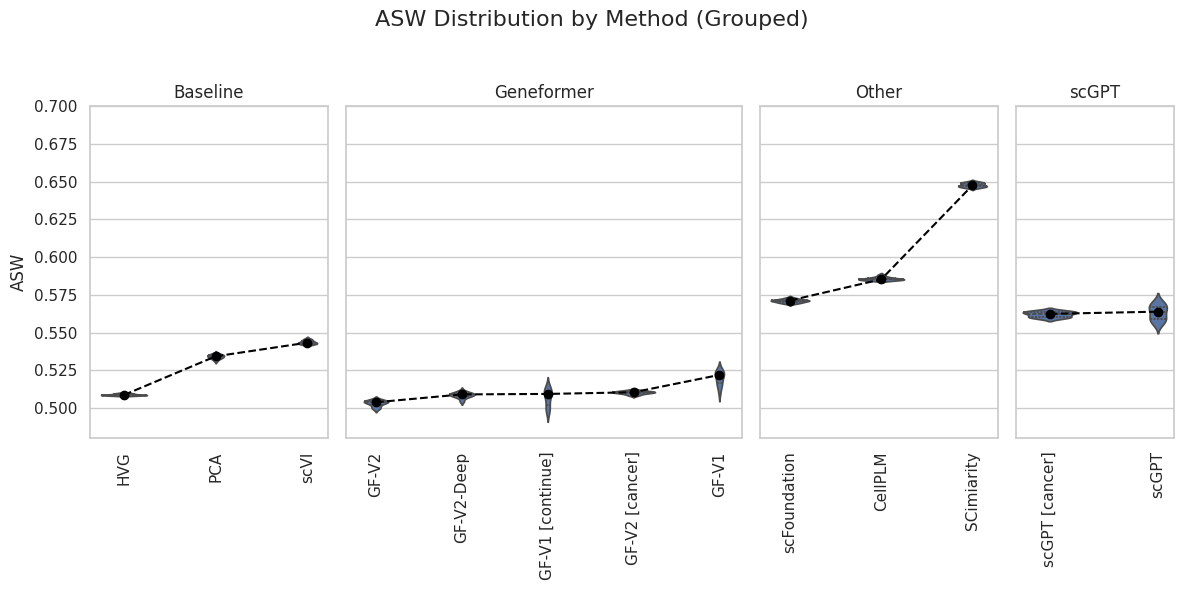

In [37]:
fig = plot_metric_by_group_violin(asw_df, metric_col="ASW", ylim=(0.48, .7))
plt.savefig('./fig2_a_metrics/asw3.png', dpi=100)